In [2]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.data import DataReader 
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
# Importing datetime for setting start and end date of the stock market dataset

from datetime import datetime

In [5]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
# Importing Tesla Motors Stock Prices

TSLA = DataReader('TSLA','yahoo',start,end)

In [7]:
# Some Basic info about the Tesla motors Stock

TSLA.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,229.701076,233.205737,226.130438,229.868208,4324062.549801,229.868208
std,23.795786,23.795793,23.620876,23.810521,2249204.152306,23.810521
min,185.830002,189.289993,181.399994,185.000000,708000.000000,185.000000
25%,209.955002,213.224999,206.309998,210.089996,2893400.000000,210.089996
50%,229.940002,232.889999,224.940002,229.949997,3836300.000000,229.949997
75%,249.619995,252.040001,246.004998,248.875000,5007250.000000,248.875000
max,280.200012,286.649994,276.299988,282.260010,15649600.000000,282.260010


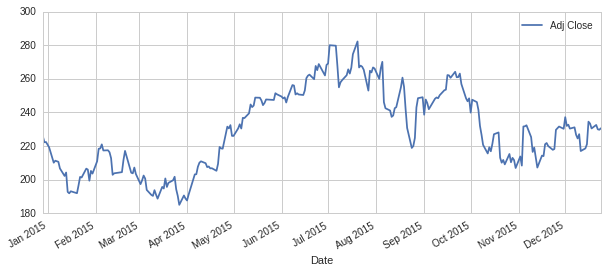

In [8]:
# Plotting Adjusted Closing price for Tesla Motors Stock

TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

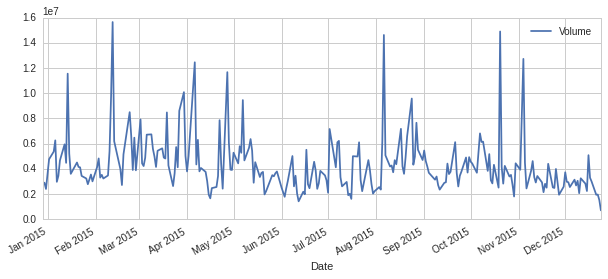

In [9]:
# Plotting the total volume of stock being traded each day

TSLA['Volume'].plot(legend=True,figsize=(10,4))

In [10]:
# Calculating Moving average for 10, 20 and 50 days of the stock price

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    TSLA[column_name] = pd.rolling_mean(TSLA['Adj Close'],ma)

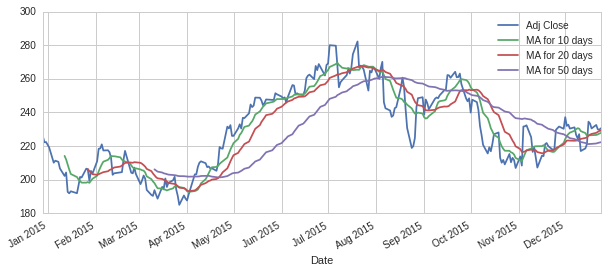

In [11]:
# Plotting the moving averages

TSLA[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

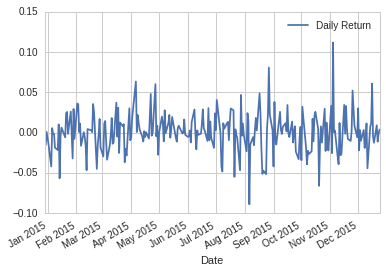

In [12]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()

TSLA['Daily Return'].plot(legend=True)

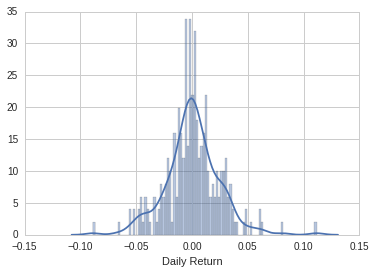

In [13]:
# Plotting the average daily returns of the stock

sns.distplot(TSLA['Daily Return'].dropna(),bins=100)

/home/srikanth/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


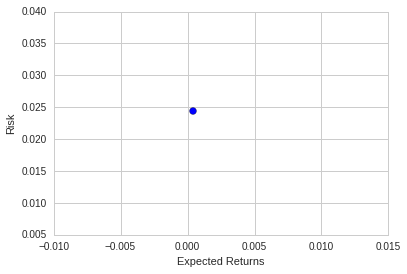

In [14]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = TSLA['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

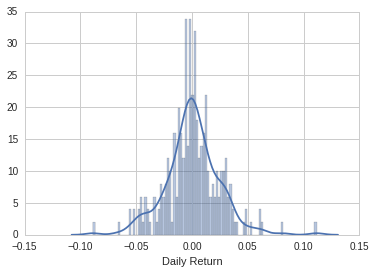

In [15]:
# Visualizing the Value at Risk

sns.distplot(TSLA['Daily Return'].dropna(),bins=100)

In [16]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

TSLA['Daily Return'].quantile(0.05)

-0.042198845580862621

In [17]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [18]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [19]:
TSLA.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2014-12-29,226.899994,227.910004,224.020004,225.710007,2802500,225.710007,NaN,NaN,NaN,NaN
2014-12-30,223.990005,225.649994,221.399994,222.229996,2903200,222.229996,NaN,NaN,NaN,-0.015418
2014-12-31,223.089996,225.679993,222.250000,222.410004,2402100,222.410004,NaN,NaN,NaN,0.000810
2015-01-02,222.869995,223.250000,213.259995,219.309998,4764400,219.309998,NaN,NaN,NaN,-0.013938
2015-01-05,214.550003,216.500000,207.160004,210.089996,5368500,210.089996,NaN,NaN,NaN,-0.042041


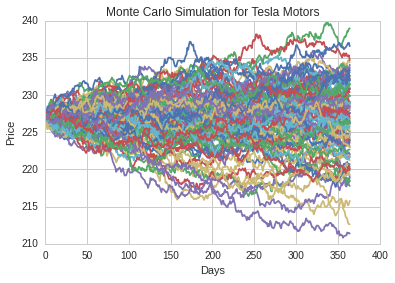

In [20]:
# Running the Monte Carlo simulation a hundred times

start_price = 226.899994

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Tesla Motors')

In [21]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

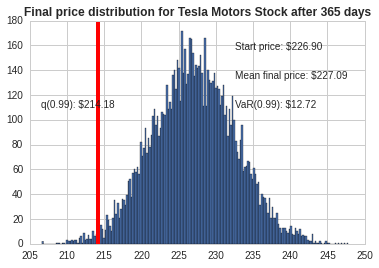

In [22]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Tesla Motors Stock after %s days" % days, weight='bold');